## __Advanced Statistics with Python Solution__




# Problem Statement :
A stock price always fluctuates, but is there a relation between a closing price and its moving averages. 
An analyst wants to project how the stock would move, he has 5 years of stock price data with him on which he needs to perform the analysis.


# Objective :
Find the possible futuristic movement of the stock 'GOOG" based on its price for the last 5 years.

# Data Description
Date - Date of the stock price
Open - Opening price of the stock on that day
High - Peak price of the stock on that day
Low - Lowest price of the stock on that day
Close - Closing price of the stock on that day
Volume - Total Volume traded on that day

# Perform the following steps
1. Get 5 years of data from yfinance package with ticker symbol 'GOOG'
2. Create 50DMA and 200DMA
3. Plot it with the actual price.
4. Basic EDA on the data.
5. Fit statsmodel ols to find the best possible features and its statistical scores.


## Step 1: Import the Required Libraries and Configure Settings

- Import yfinance, matplotlib.pyplot, seaborn, and warnings libraries
- Configure warnings and matplotlib settings

In [2]:
# Import libraries
import yfinance as yahooFinance
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
import mplcyberpunk
plt.style.use("cyberpunk")

## Step 2: Fetch Stock Data and Display Basic Information

Fetch the 5 years of Google stock data using yfinance


In [4]:
google = yahooFinance.Ticker('GOOG')

In [5]:
df = google.history('5Y')

Display the head and tail of the data

In [6]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-12-17 00:00:00-05:00,51.875500,52.657501,50.395000,50.826500,47708000,0.0,0.0
2018-12-18 00:00:00-05:00,51.304501,52.473999,51.071999,51.435501,43850000,0.0,0.0
2018-12-19 00:00:00-05:00,51.699501,53.099998,50.402500,51.150501,49586000,0.0,0.0
2018-12-20 00:00:00-05:00,50.906502,51.710999,49.818001,50.470501,53470000,0.0,0.0
2018-12-21 00:00:00-05:00,50.764999,51.201000,48.684502,48.977001,91920000,0.0,0.0


Check the shape of the data

In [7]:
df.shape

(1258, 7)

### Anatomy of a candlestick and price types of a stock
![d](https://www.wallstreetmojo.com/wp-content/uploads/2022/08/Candlestick-Analysis.jpg)

**Observation:**

- The dataset has 1258 rows and 7 columns.

<Axes: xlabel='Date'>

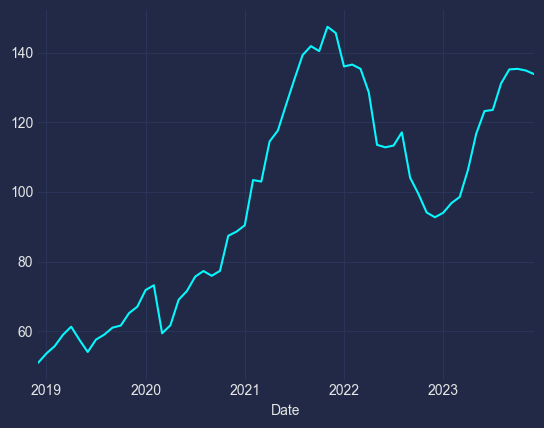

In [8]:
# aggregate by month average
df['Close'].resample('M').mean().plot()

Let's describe the data.

In [9]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.000000
mean,97.909063,99.049023,96.888247,97.991673,2.931638e+07,0.0,0.015898
std,30.219658,30.498372,29.908462,30.189583,1.293536e+07,0.0,0.563884
min,48.695000,50.176998,48.505501,48.811001,6.936000e+06,0.0,0.000000
25%,68.145750,69.439253,67.512501,68.635874,2.108400e+07,0.0,0.000000
50%,99.215000,100.849998,97.835003,99.435001,2.625900e+07,0.0,0.000000
75%,125.665514,126.733751,124.632214,125.737499,3.320700e+07,0.0,0.000000
max,151.863495,152.100006,149.887497,150.709000,1.241400e+08,0.0,20.000000


The highest price ever recorded for GOOG in the past 5 years is $152.1

Let's check the overview of closing price before calculating DMAs.

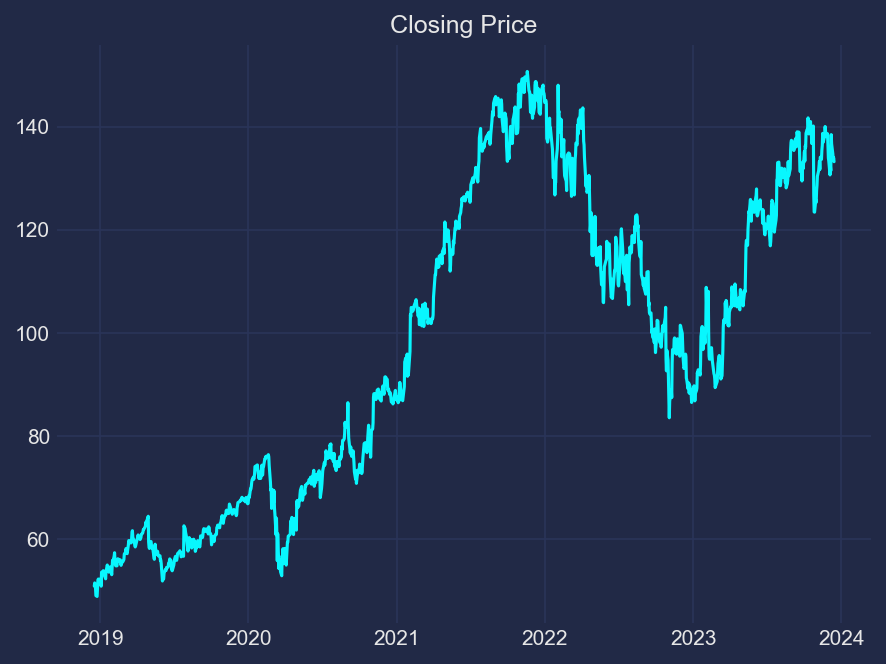

In [10]:
plt.figure(figsize = (7,5),dpi = 150)
plt.title('Closing Price')
plt.plot(df['Close'])

plotting a stock using candlestick

In [15]:
import plotly.graph_objects as go
import plotly.io as pio

import pandas as pd
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])],
                )

fig.update_layout(template='plotly_dark')
fig.show()

## Step 3: Calculate Moving Averages and Update the Dataset

Let's calculate the 50DMA and 200DMA (day moving averages).

In [30]:
df['fiftyDMA'] = df['Close'].rolling(50).mean()

In [31]:
df['thDMA'] = df['Close'].rolling(200).mean()

Descibe the data again

In [32]:
df.describe()

,Open,High,Low,Close,Volume,fiftyDMA,thDMA
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1209.000000,1059.000000
mean,97.909063,99.049023,96.888247,97.991673,2.931638e+07,98.166566,98.874102
std,30.219658,30.498372,29.908462,30.189583,1.293536e+07,29.254508,26.209334
min,48.695000,50.176998,48.505501,48.811001,6.936000e+06,53.877600,57.362515
25%,68.145750,69.439253,67.512501,68.635874,2.108400e+07,69.081465,70.971439
50%,99.215000,100.849998,97.835003,99.435001,2.625900e+07,98.119400,102.599975
75%,125.665514,126.733751,124.632214,125.737499,3.320700e+07,124.680460,120.535860
max,151.863495,152.100006,149.887497,150.709000,1.241400e+08,146.183850,139.273730


**Inferences from summary**:
- There are not many valid rows for __Dividends__ and __Stock Splits__, so let's remove these columns from the original dataset.

Drop __Dividends__ and __Stock Splits__ columns

In [ ]:
df.drop(columns = ['Dividends','Stock Splits'],inplace = True)

Print the head of the dataset

In [ ]:
df.head()

,Open,High,Low,Close,Volume,fiftyDMA,thDMA
Date,,,,,,,
2018-12-17 00:00:00-05:00,51.875500,52.657501,50.395000,50.826500,47708000,NaN,NaN
2018-12-18 00:00:00-05:00,51.304501,52.473999,51.071999,51.435501,43850000,NaN,NaN
2018-12-19 00:00:00-05:00,51.699501,53.099998,50.402500,51.150501,49586000,NaN,NaN
2018-12-20 00:00:00-05:00,50.906502,51.710999,49.818001,50.470501,53470000,NaN,NaN
2018-12-21 00:00:00-05:00,50.764999,51.201000,48.684502,48.977001,91920000,NaN,NaN


**Observations**:
- While calculating the moving average, the dataset displays NaN values in the __fiftyDMA1__ and __thDMA__ columns.
- Moving average is calculated for first 50 rows in __fiftyDMA__ column, so for first 50 rows value would be __NaN__ in that column.
- Moving average is calculated for first 200 rows in __thDMA__ column, so for first 200 rows value would be __NaN__ in that column.

In [ ]:
df.tail()

,Open,High,Low,Close,Volume,fiftyDMA,thDMA
Date,,,,,,,
2023-12-08 00:00:00-05:00,135.660004,137.990005,135.570007,136.639999,22990900,134.894799,122.588675
2023-12-11 00:00:00-05:00,133.820007,134.789993,132.889999,134.699997,24502900,134.951799,122.815425
2023-12-12 00:00:00-05:00,133.270004,134.539993,132.830002,133.639999,26584000,134.921199,123.033125
2023-12-13 00:00:00-05:00,134.544998,134.779999,132.949997,133.970001,25414500,134.934599,123.251475
2023-12-14 00:00:00-05:00,134.770004,135.035004,131.065002,133.199997,29577273,134.873199,123.464925


## Step 4: Plot the Closing Price, 50DMA, and 200DMA

Plot the graph between closing price vs. 50DMA vs. 200DMA


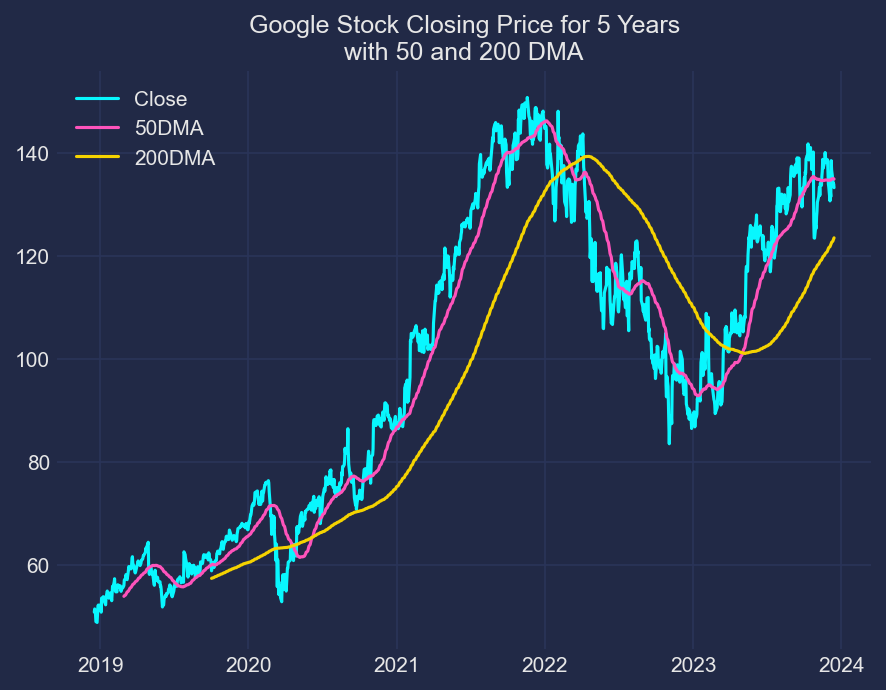

In [35]:
plt.figure(figsize = (7,5), dpi = 150)
plt.title('Google Stock Closing Price for 5 Years\nwith 50 and 200 DMA')
plt.plot(df['Close'],label = 'Close')
plt.plot(df['fiftyDMA'],label = '50DMA')
plt.plot(df['thDMA'], label = '200DMA')
plt.legend()

**Inferences from the above graph:**
1. 50DMA and 200DMA are fairly good indicators of how the stock is moving.
2. If the closing price is above the 50DMA or 200DMA, it is usually on the uptrend.
3. If the closing price is below the 50DMA or 200DMA, it usually means that it is in a downward trend.
4. Every point where 50DMA and 200DMA intersect, the market usually reverses its trend ( High -> Low | Low -> High )
5. The huge dip in March 2020 indicates the Covid-19 market crash.

In [ ]:
#doing the same plot but with plotly
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                name='Stock Price'),
                go.Scatter(x=df.index,
                           y=df['fiftyDMA'],
                           line=dict(color='#FFBE0A', width=1),
                           name='50 DMA'),
                go.Scatter(x=df.index,
                           y=df['thDMA'],
                           line=dict(color='#00CED1', width=1),
                           name='200 DMA')
                ])
fig.update_layout(plot_bgcolor='#2e2c2c')
fig.update_xaxes(showgrid=True, gridwidth=.5, gridcolor='#474343',griddash='dash')
fig.update_yaxes(showgrid=True, gridwidth=.5, gridcolor='#474343',griddash='dash')

fig.show()

# Finding the Possible Futuristic Movement of the Stock

## Step 5: Analyze the Correlation Between Variables and Plot Distributions

Create a heatmap to analyze the correlation between variables

<Axes: >

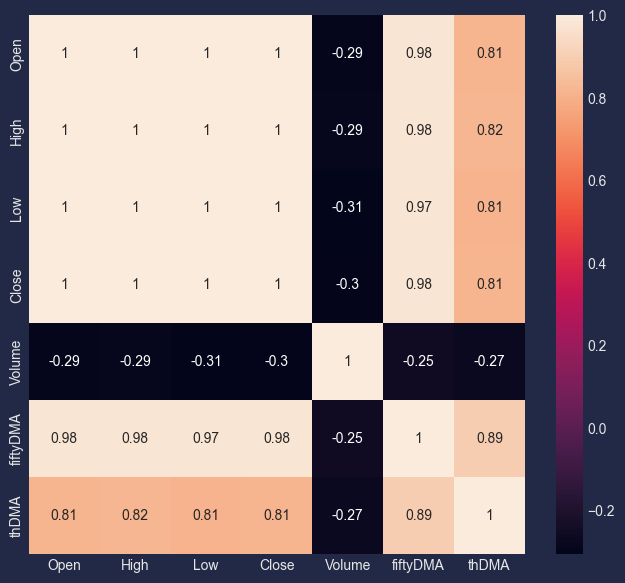

In [36]:
plt.figure(figsize=(8,7),dpi = 100)
sns.heatmap(df.corr(),annot = True )

**Observations**:
1. Closing price has a very high correlation with almost all the variables except the volume.
2. There is strong multicollinearity between the variables as well.

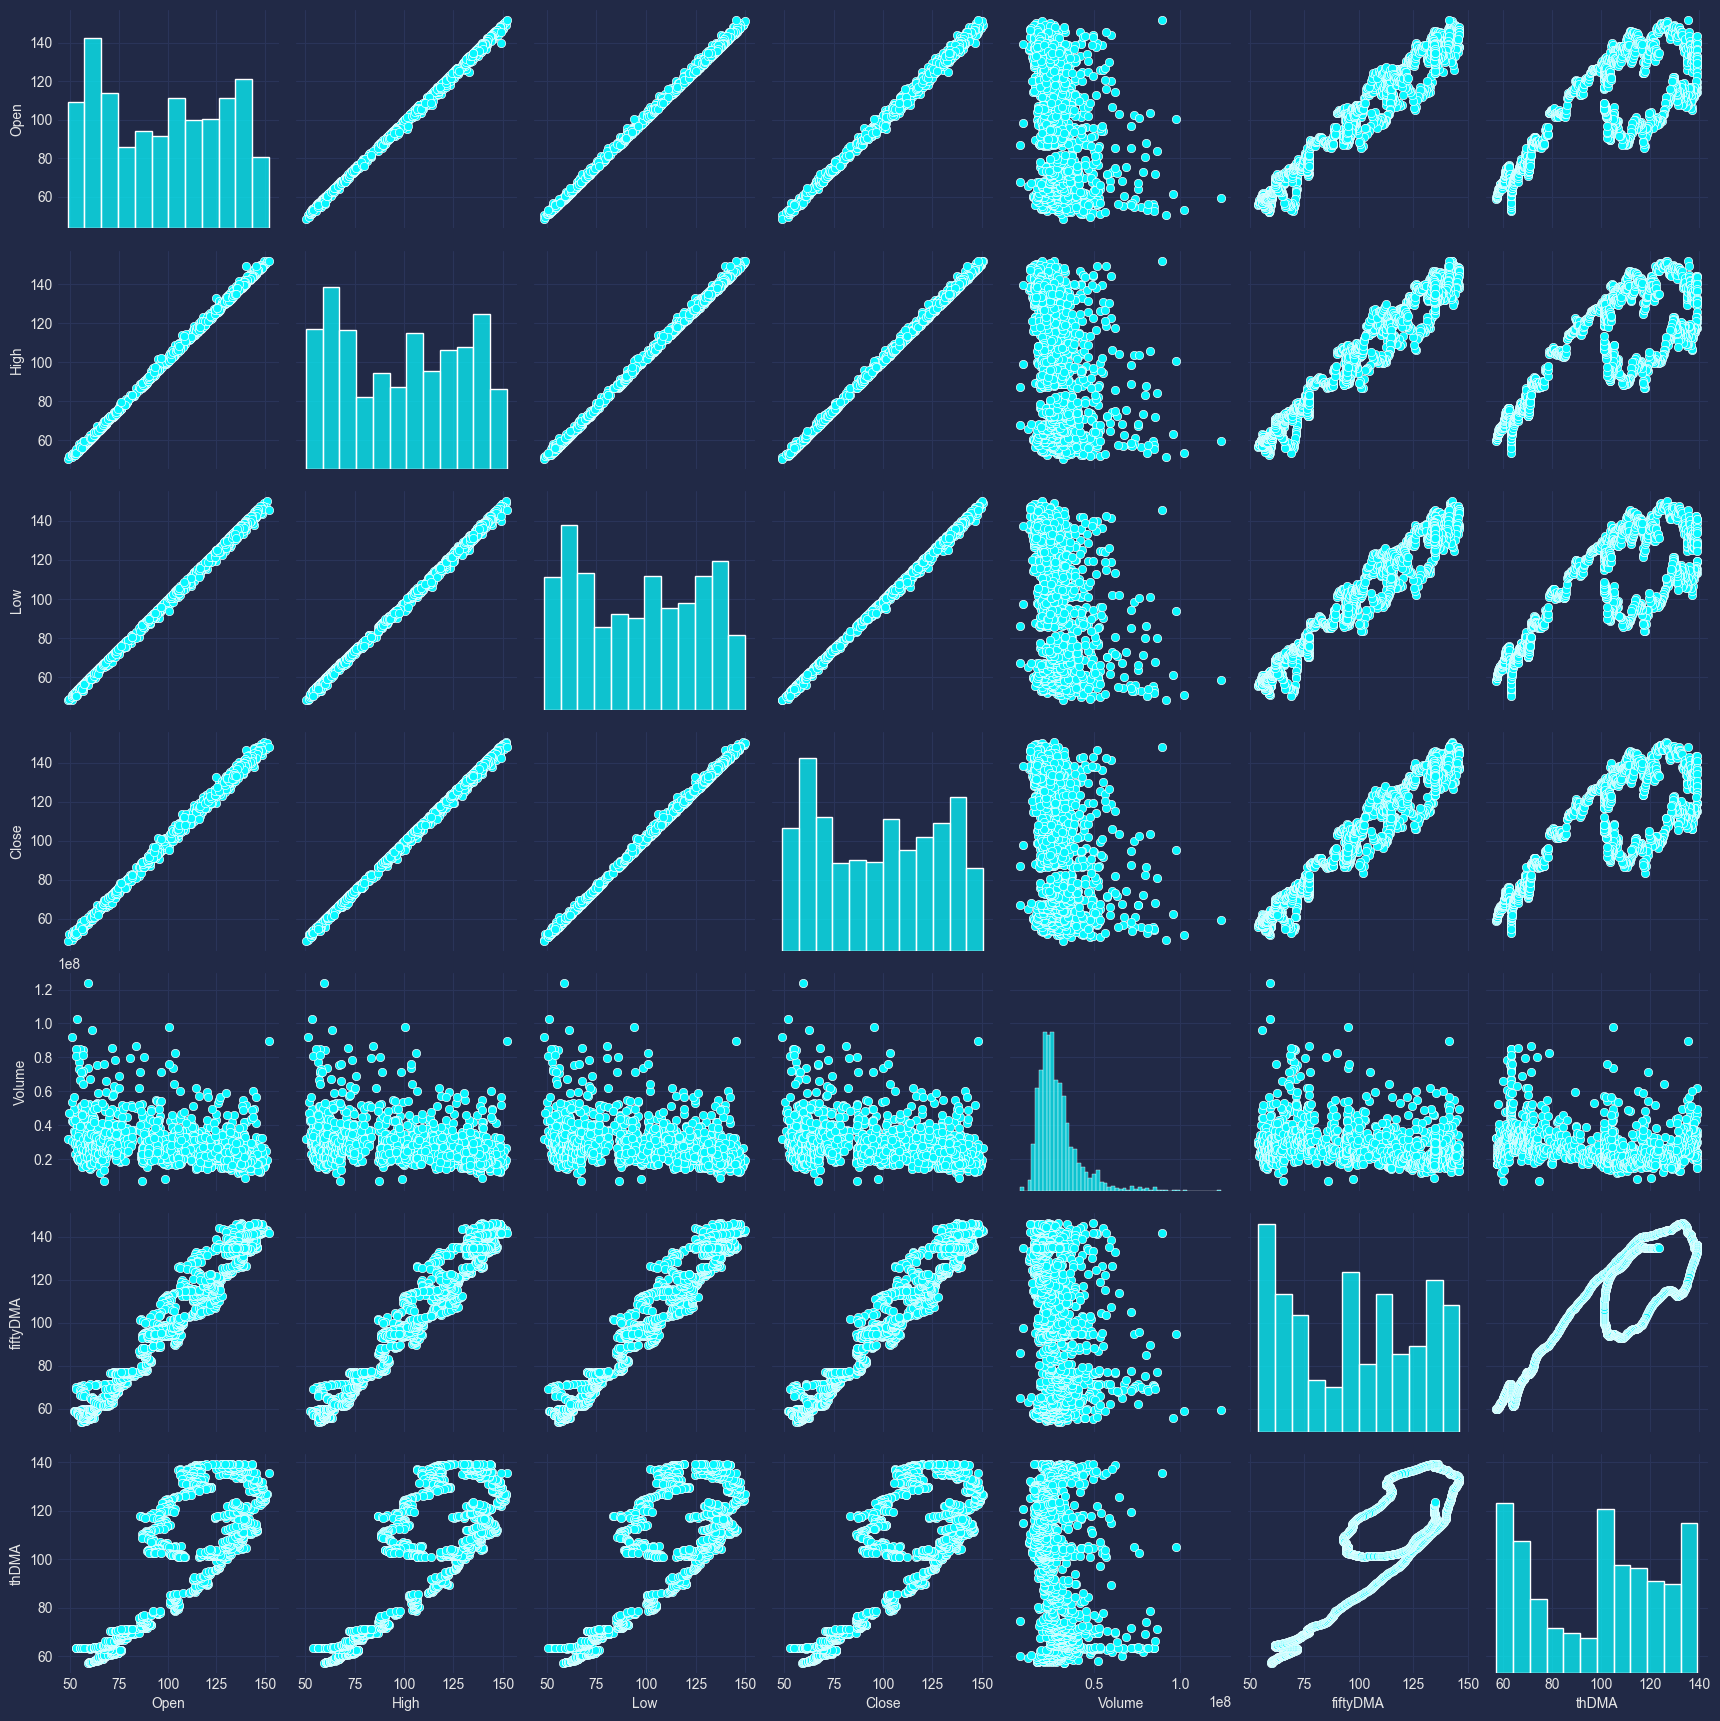

In [37]:
sns.pairplot(df)

In [ ]:
import plotly.express as px
fig = px.imshow(df.corr(), text_auto=True, color_continuous_scale='Viridis')
fig.show()

### Compare Close and 50 DMA Distributions

Text(0.5, 1.0, 'Close Price Distribution')

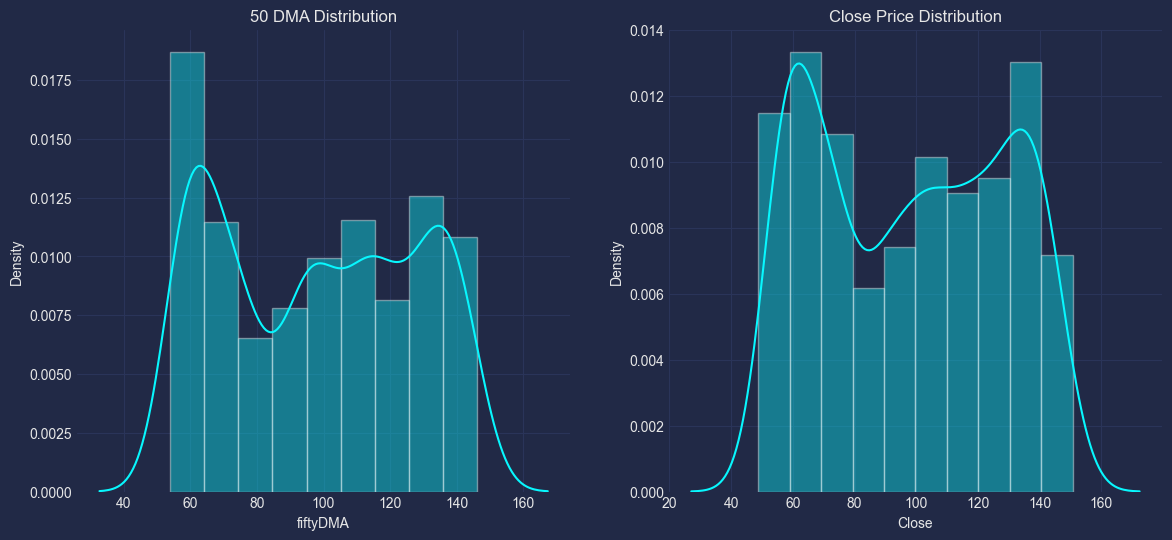

In [38]:
fig, axs =plt.subplots(ncols=2, nrows=1, figsize=(14,6)) 
axs = axs.flatten()
sns.distplot(df['fiftyDMA'], ax=axs[0])
axs[0].set_title('50 DMA Distribution')
sns.distplot(df['Close'], ax=axs[1])
axs[1].set_title('Close Price Distribution')


****Observations****:

- Both plot __50DMA__ and __Closed Price__ follow same distribution.

## Step 6: Fit a Linear Model


- Display the model summary

Import statsmodel package


In [ ]:
import statsmodels.formula.api as smf

Fit a linear model using 50DMA as a predictor

- **Note:** Although 200DMA has a high correlation with close price and it is also closely related to 50 DMA, we have not used it for our model since we need to avoid multicollinearity when picking features for our dataset.

In [ ]:
model = smf.ols(formula = 'Close ~ fiftyDMA', data = df)
model = model.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 2.428e+04
Date:                Thu, 14 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:37:53   Log-Likelihood:                -3960.0
No. Observations:                1209   AIC:                             7924.
Df Residuals:                    1207   BIC:                             7934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4039      0.645      5.274      0.000       2.138       4.670
fiftyDMA       0.9818      0.006    155.815      0.000       0.969       0.994
==============================================================================
Omnibus:                       71.032   Durbin-Watson:                   0.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.590
Skew:                          -0.609   Prob(JB):                     1.16e-18
Kurtosis:                       3.396   Cond. No.                         359.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observations**:
1. The R-squared is 0.973, which means the line fits very well.
1. The coef is also good.
2. Since the target variable and feature variable are very highly correlated, ~ 1, it isn't wise to fit the model based on the parameters in real life.

 Interpreting the results of a linear regression model from statsmodels can seem tricky at first, but once you know what to look for it becomes straightforward. Here are the key things to interpret:

**Coefficients (params)**
- The coefficient for each variable indicates the size of the effect that variable is having on the response. A larger coefficient means the variable has a larger impact.

**P-Values**
- The p-value next to each coefficient indicates if that variable is having a statistically significant impact on the response. Typically, a p-value < 0.05 means it is significant.

**R-Squared and Adjusted R-Squared**
- These metrics indicate how much variance in the response is explained by the model. Values close 1 indicate the predictors explain a lot of the variance. Adjusted accounts for model complexity.

**F-Statistic and P-Value**
- These relate to the overall fit of the model. If the p-value here is < 0.05 then there is likely a relationship in the data that the model is capturing.

So in summary, look for significant p-values on the coefficients, high R-Squared values, a significant F-Statistic, and logical signs (positive/negative) on the coeffs based on the expected relationships. Let me know if you need any help interpreting a specific model output!

## Step 7: Plot Closing Price vs. 50DMA vs. 200DMA Again




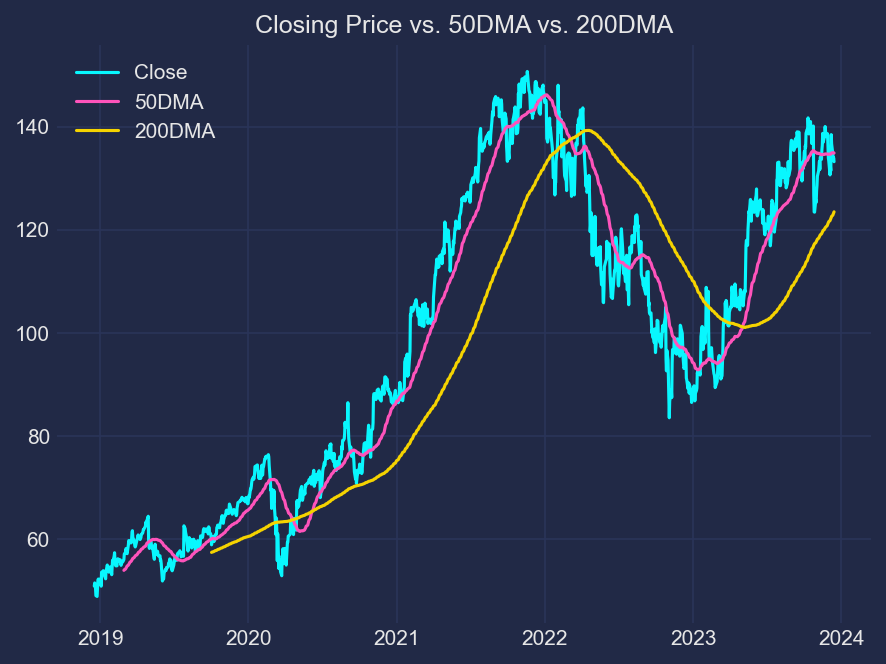

In [41]:
plt.figure(figsize=(7,5),dpi = 150)
plt.title('Closing Price vs. 50DMA vs. 200DMA')
plt.plot(df['Close'],label = 'Close')
plt.plot(df['fiftyDMA'],label = '50DMA')
plt.plot(df['thDMA'], label = '200DMA')
plt.legend()

**Observations**:
- In the year 2022, the closing price is below 50DMA and 200DMA, so prices will continue to fall.
- In the end, closing prices increase dramatically, meaning that 50DMA and 200DMA will change over time as a result.
- Based on the graph, it seems unlikely that the price will fall very steeply due to a little resistance to the price.